In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

K-means é um agoritmo de clusterizão que objetiva particionar n observações dentre k grupos onde cada observação pertence ao grupo mais próximo da média.<br>
O termo "k-means" foi empregado primeiramente por James MacQueen em 1967, embora a ideia remonta a Hugo Steinhaus em 1957 O "Standard algorithm" foi proposto primeiramente por Stuart Lloyd em 1957 como uma técnica para modulação por código de pulso, embora não tenha sido publicada fora dos laboratórios Bell até 1982. Em 1965, E.W.Forgy publicou essencialmente o mesmo método, é por isso que é por vezes referido também como Lloyd-Forgy. Uma versão mais eficiente foi proposta e publicada em Fortran por Hartigan e Wong, no período entre 1975 e 1979. Fonte:https://pt.wikipedia.org/wiki/Kmeans#:~:text=Em%20minera%C3%A7%C3%A3o%20de%20dados%2C%20agrupamento,em%20um%20Diagrama%20de%20Voronoi.<br>

O K-means é um algoritmo do tipo não supervisionado, ou seja, que não trabalha com dados rotulados.

O objetivo desse algoritmo é encontrar similaridades entre os dados e agrupá-los conforme o número de cluster passado pelo argumento k.

Este utiliza um método simples e eficiente baseado no conceito de distância conforme explicado acima.

O algoritmo de forma iterativa atribui os pontos de dados ao grupo que representa a menor distância, ou seja, ao grupo de dados que seja mais similar.

O processo executado pelo K-Means é composto por quatro etapas:<br>
$=>$Inicialização<br>
$=>$Atribuição ao Cluster<br>
$=>$Movimentação de Centroids<br>
$=>$Otimização do K-médias

Usaremos a biblioteca `sklearn` e gerar alguns dados em duas dimensões para conseguirmos visualizar seus centroides.
Para criar os dados, vamos utilizar a função `make_blobs` da biblioteca `sklearn` no módulo dos `datasets`. Essa função gera dados em formas de "bolhas", isto é, os dados são gerados em forma de grupos:
 A função make_blobs nos retorna os xn... e o valor de y, isto é, as variáveis independentes e a variável dependente.

In [2]:
from sklearn.datasets import make_blobs

Queremos os dados em duas dimensões, o número de features (`n_features`) deve ser igual a 2 com 1000 exemplos (`n_samples`) de testes e para termos os mesmos dados, vamos setar o parâmetro de aleatoriedade como 7 (`random_state`):

In [3]:
dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)

O `make_blobs` retorna um par de dados (x, y) e não queremos o y, usamos o underscore (_) para ignorar o retorno dessa variável.

Vamos transformar estes dados em um DataFrame do pandas e renomear as colunas para coluna1 e coluna2.

In [6]:
dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
dados.head()

,coluna1,coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


Para fazer o gráfico deve se cruzar os dados das colunas e assim plotar a distribuição.

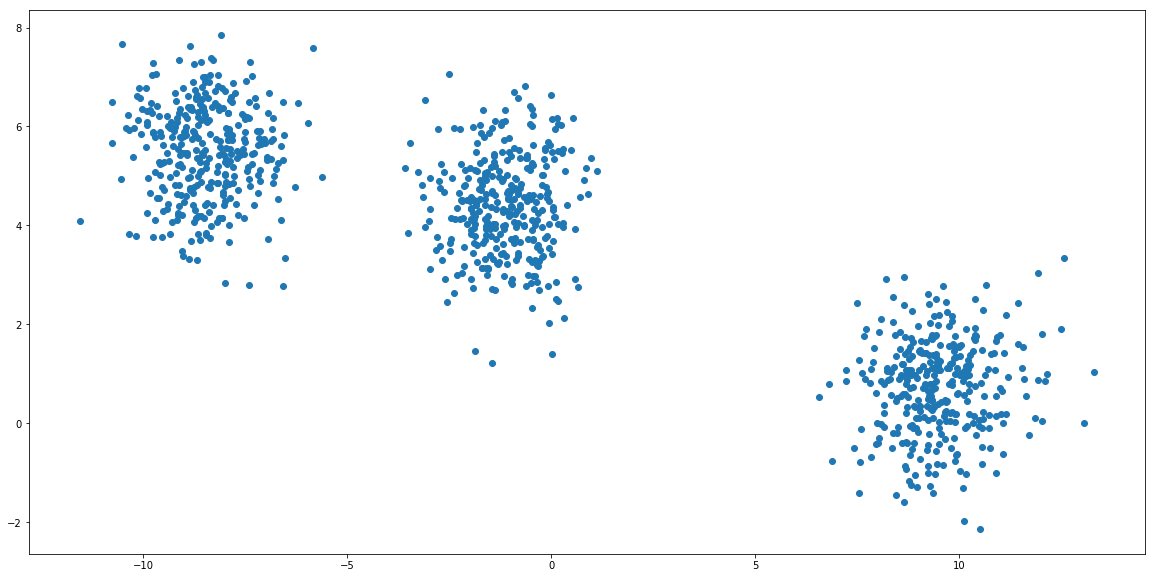

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(x=dados.coluna1, y=dados.coluna2)

Usar o KMeans para criar um modelo com 3 grupos e segmentar os nossos dados baseado no modelo criado.

In [16]:
modelo = KMeans(n_clusters=3)
grupos = modelo.fit_predict(dados)

Plotar os dados segmentados identificando os grupos com cores distintas (`c=grupos`) e vívidas (`cmap='viridis'`).

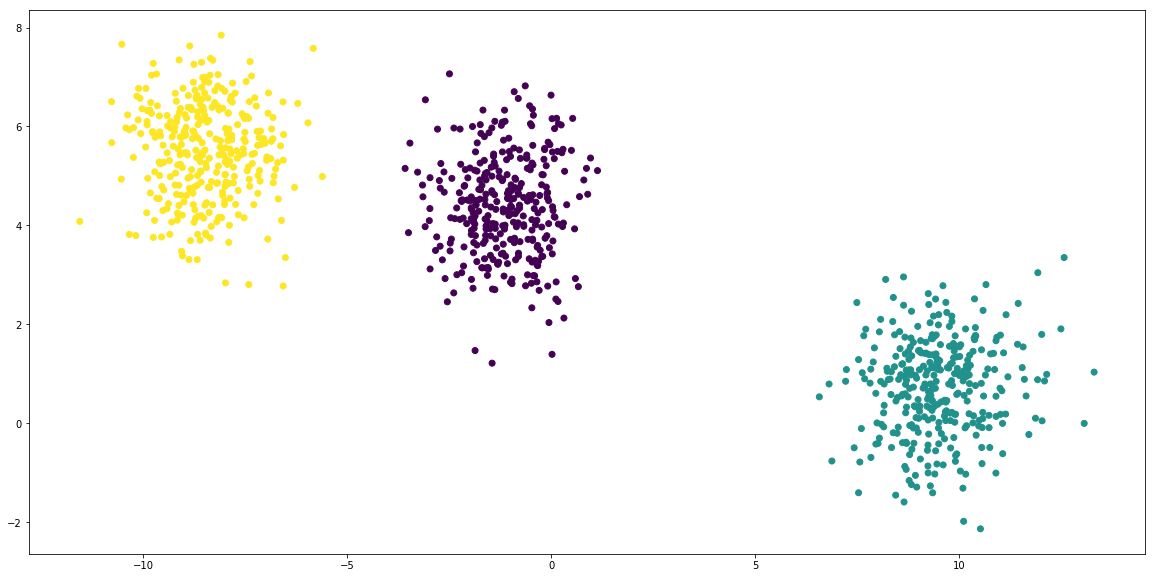

In [18]:
plt.figure(figsize=(20,10))
plt.scatter(x=dados.coluna1, y=dados.coluna2, 
            c=grupos,
           cmap='viridis')

Gerar os pontos centrais para os grupos, e plotar novamente nossos grupos.

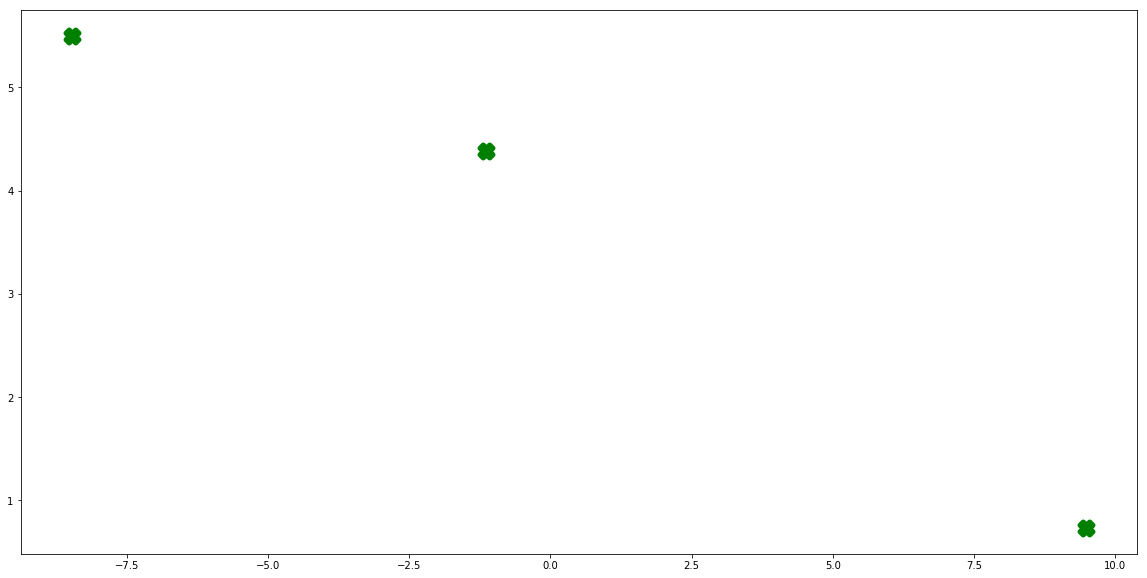

In [27]:
plt.figure(figsize=(20,10))
centroides = modelo.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1],
           marker='X', s=169, linewidths=5,
           color='g', zorder=8)

O pandas  devolve os centroides em forma de matriz, então montamos a localização cartesiana pegando a posição 0 para o eixo x (centroides[:,0]) e a posição 1 para o eixo y (centroides[:,1]) . Também podemos estilizar a representação do  centroide, marcando como um X (marker='X'), setando o tamanho (s=169), a largura da linha (linewidths=5), cor (color=g) e a hierarquia de aparição (zorder=8).

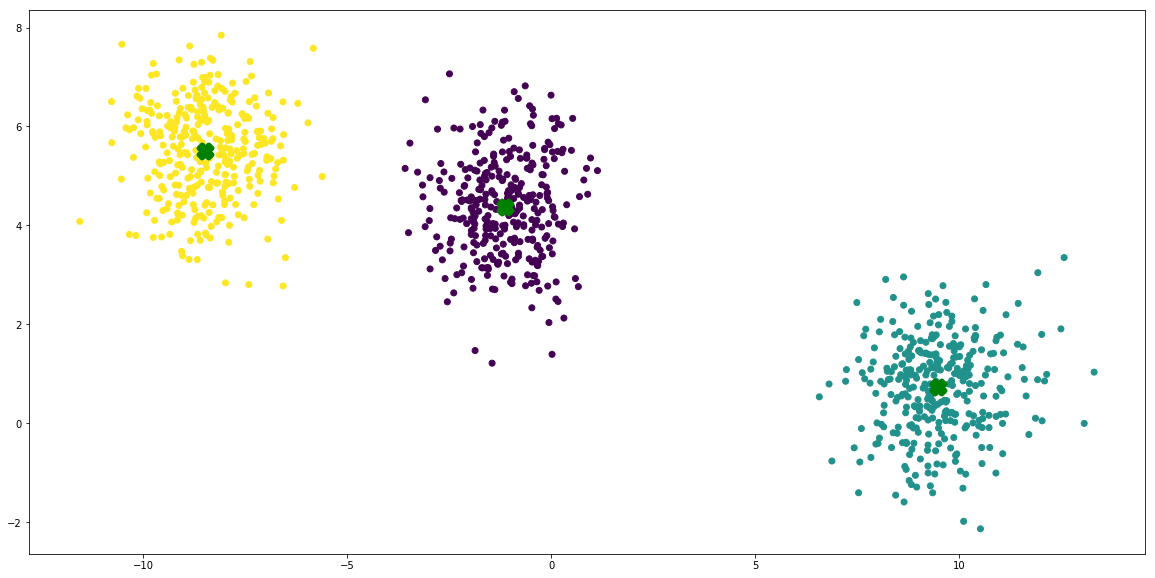

In [24]:
plt.figure(figsize=(20,10))
centroides = modelo.cluster_centers_
plt.scatter(dados.coluna1, dados.coluna2,
            c=grupos,
           cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1],
           marker='X', s=169, linewidths=5,
           color='g', zorder=8)

Com isso, temos nossos dados plotados em 3 grupos de cores distintas com centroides bem localizados.